In [7]:
import numpy as np
import matplotlib.pyplot as plt

Epoch 0, Loss:0.30549152255472367
Epoch 4000, Loss:0.004592355347869441
Epoch 8000, Loss:0.0010127466745903848
Predictions after training:
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]


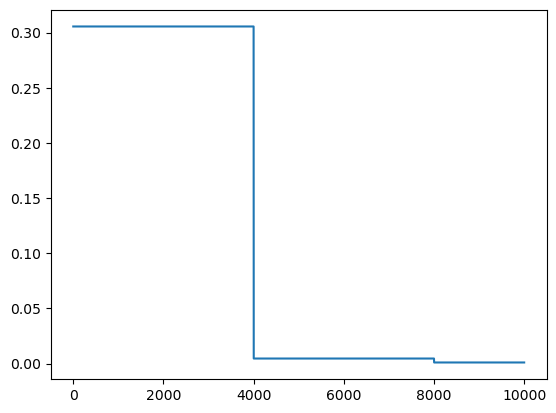

In [13]:

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)

        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.bias_output = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def feedforward(self, X):
        self.hidden_activation = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.sigmoid(self.hidden_activation)

        self.output_activation = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.predicted_output = self.sigmoid(self.output_activation)

        return self.predicted_output

    def backward(self, X, y, learning_rate):
        output_error = y - self.predicted_output
        output_delta = output_error * self.sigmoid_derivative(self.predicted_output)

        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_output)

        self.weights_hidden_output += np.dot(self.hidden_output.T, output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += np.dot(X.T, hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        err_arr = []
        iter_arr = []
        for epoch in range(epochs):
            output = self.feedforward(X)
            self.backward(X, y, learning_rate)
            
            if epoch % 4000 == 0:
                loss = np.mean(np.square(y - output))
                print(f"Epoch {epoch}, Loss:{loss}")
                
            err_arr.append(loss)
            iter_arr.append(epoch)
            
            
        plt.plot(iter_arr,err_arr)
        

X = np.array([[0, 0,0], [0,0, 1], [0,1, 0], [0, 1, 1], [1,0,0], [1,0,1], [1,1,0], [1,1,1]  ])
y = np.array([[0], [0], [0], [0], [0], [0], [0], [1]])

nn = NeuralNetwork(input_size=3, hidden_size=2, output_size=1)
nn.train(X, y, epochs=10000, learning_rate=0.1)  # 1000 iterations are not enough. Model predicts wrongly depending on the initial random value

# Test the trained model
output = nn.feedforward(X)
print("Predictions after training:")
print(output.round())
